In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
# CMIP6 data downloaded from https://esgf-node.ipsl.upmc.fr/search/cmip6-ipsl/

files = glob.glob("../NorESM2-LM/tasmax_day*")
files.sort()
tasmax_NorESM = xr.open_mfdataset(files)

files = glob.glob("../NorESM2-LM/tasmin_day*")
files.sort()
tasmin_NorESM = xr.open_mfdataset(files)

In [8]:
tmax = tasmax_NorESM.tasmax.sel(lat=slice(57.6, 72.8), 
                        lon=slice(1.4, 34.7), 
                        time=slice('2015-01-01', '2055-01-01'))

tmin = tasmin_NorESM.tasmin.sel(lat=slice(57.6, 72.8), 
                        lon=slice(1.4, 34.7), 
                        time=slice('2015-01-01', '2055-01-01'))
tmin

<xarray.DataArray 'tasmin' (time: 14601, lat: 8, lon: 13)> Size: 6MB
dask.array<getitem, shape=(14601, 8, 13), dtype=float32, chunksize=(1, 8, 13), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 117kB 2015-01-01 12:00:00 ... 2055-01-01 12:00:00
  * lat      (lat) float64 64B 57.79 59.68 61.58 63.47 65.37 67.26 69.16 71.05
  * lon      (lon) float64 104B 2.5 5.0 7.5 10.0 12.5 ... 25.0 27.5 30.0 32.5
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Minimum Near-Surface Air Temperature
    comment:        minimum near-surface (usually, 2 meter) air temperature (...
    units:          K
    original_name:  TREFHTMN
    cell_methods:   area: mean time: minimum
    cell_measures:  area: areacella
    history:        2019-12-06T14:55:16Z altered by CMOR: Treated scalar dime...

## Defintions of climate indices

In [ ]:
def TNmin(da):
    # Calculate annual minimum temperature
    # Input: daily minimum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    annual_minimum_temperatures = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                TNmin = min(da_i.values)

                annual_minimum_temperatures[lat, lon, year] = TNmin
    
    return annual_minimum_temperatures



def TXmax(da):
    # Calculate annual maximum temperature
    # Input: daily maximum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    annual_maximum_temperatures = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                TXmax = max(da_i.values)

                annual_maximum_temperatures[lat, lon, year] = TXmax
    
    return annual_maximum_temperatures

def FD(da):
    # Calculate number of frost days
    # Input: daily minimum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    n_frost_days = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                print(da_i.values)
                FD = np.sum(da_i.values < 273.15)
                print(FD)
                n_frost_days[lat, lon, year] = FD
    
    return n_frost_days

def ID(da):
    # Calculate number of icing days
    # Input: daily maximum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    n_icing_days = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                ID = np.sum(da_i.values < 273.15)
                n_icing_days[lat, lon, year] = ID
    
    return n_icing_days

def TR(da):
    # Calculate number of tropical nights
    # Input: daily minimum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    n_tropical_nights = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                TR = np.sum(da_i.values < 293.15)
                n_tropical_nights[lat, lon, year] = TR
    
    return n_tropical_nights

def SU(da):
    # Calculate number of summer days
    # Input: daily maximum temperature
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    n_summer_days = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                SU = np.sum(da_i.values > 298.15)
                n_summer_days[lat, lon, year] = SU
    
    return n_summer_days

def WSDI(da, TXin90):
    # Calculate well spell duration index
    # Input: daily maximum temperature
    # NOT FINISHED
    n_lats = len(da.lat)
    n_lons = len(da.lon)
    n_years = int(len(da.time)/365)

    warm_spell_duration_index = np.zeros((n_lats, n_lons, n_years))

    for lat in range(n_lats):
        print(lat, "of 8")
        for lon in range(n_lons):
            for year in range(n_years):
                da_i = da.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365))
                WSDI = np.sum(da_i.values > TXin90)
                warm_spell_duration_index[lat, lon, year] = WSDI
    
    return warm_spell_duration_index


In [13]:
FD(tmin)

0 of 8
<xarray.DataArray 'time' (time: 365)> Size: 3kB
array([cftime.DatetimeNoLeap(2015, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 3, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2015, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 12, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 12, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 3kB 2015-01-01 12:00:00 ... 2015-12-31 12:00:00
    lat      float64 8B 57.79
    lon      float64 8B 2.5
    height   float64 8B 2.0
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time
<xarray.DataArray 'time' (time: 365)> Size: 3kB
array([cftime.DatetimeNoLeap(2016, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2016, 1, 2, 12, 0, 0, 0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
TNmin = TNmin(tmin)
TNmin

0 of 8
1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8


array([[[273.36138916, 270.42788696, 271.62374878, ..., 271.97302246,
         272.06973267, 272.5010376 ],
        [271.52215576, 268.55331421, 269.55401611, ..., 272.09066772,
         269.31851196, 269.17437744],
        [268.53897095, 267.23657227, 267.92901611, ..., 269.10839844,
         267.43347168, 266.20944214],
        ...,
        [250.44184875, 256.49298096, 260.36749268, ..., 255.34822083,
         256.96673584, 246.85501099],
        [247.71676636, 251.67422485, 254.23680115, ..., 254.62107849,
         252.44764709, 242.11798096],
        [246.80976868, 249.03033447, 255.62637329, ..., 250.64564514,
         250.60510254, 240.90519714]],

       [[270.90490723, 267.07681274, 271.22628784, ..., 271.23376465,
         269.85366821, 271.41964722],
        [266.20846558, 262.94909668, 267.7869873 , ..., 269.71856689,
         265.37902832, 265.87121582],
        [252.65568542, 251.89724731, 256.06546021, ..., 251.26124573,
         254.3026123 , 248.82196045],
        ...,


In [ ]:
ds = xr.Dataset(
    data_vars=dict(
        annual_minimum_temperature=(["lat", "lon", "time"], TNmin)
    ),
    coords=dict(
        lat=tmin.lat.values,
        lon=tmin.lon.values,
        time=np.arange(2015,2056,1),
    ),
    attrs=dict(description="Annual minimum temperature",
                units="days"),
)

print(ds)
ds.to_netcdf("../TNmin_NorESM2.nc")

<xarray.Dataset> Size: 34kB
Dimensions:                     (lat: 8, lon: 13, time: 40)
Coordinates:
  * lat                         (lat) float64 64B 57.79 59.68 ... 69.16 71.05
  * lon                         (lon) float64 104B 2.5 5.0 7.5 ... 30.0 32.5
  * time                        (time) int64 320B 0 1 2 3 4 5 ... 35 36 37 38 39
Data variables:
    annual_minimum_temperature  (lat, lon, time) float64 33kB 273.4 ... 258.0
Attributes:
    description:  Annual minimum temperature
    units:        days


41


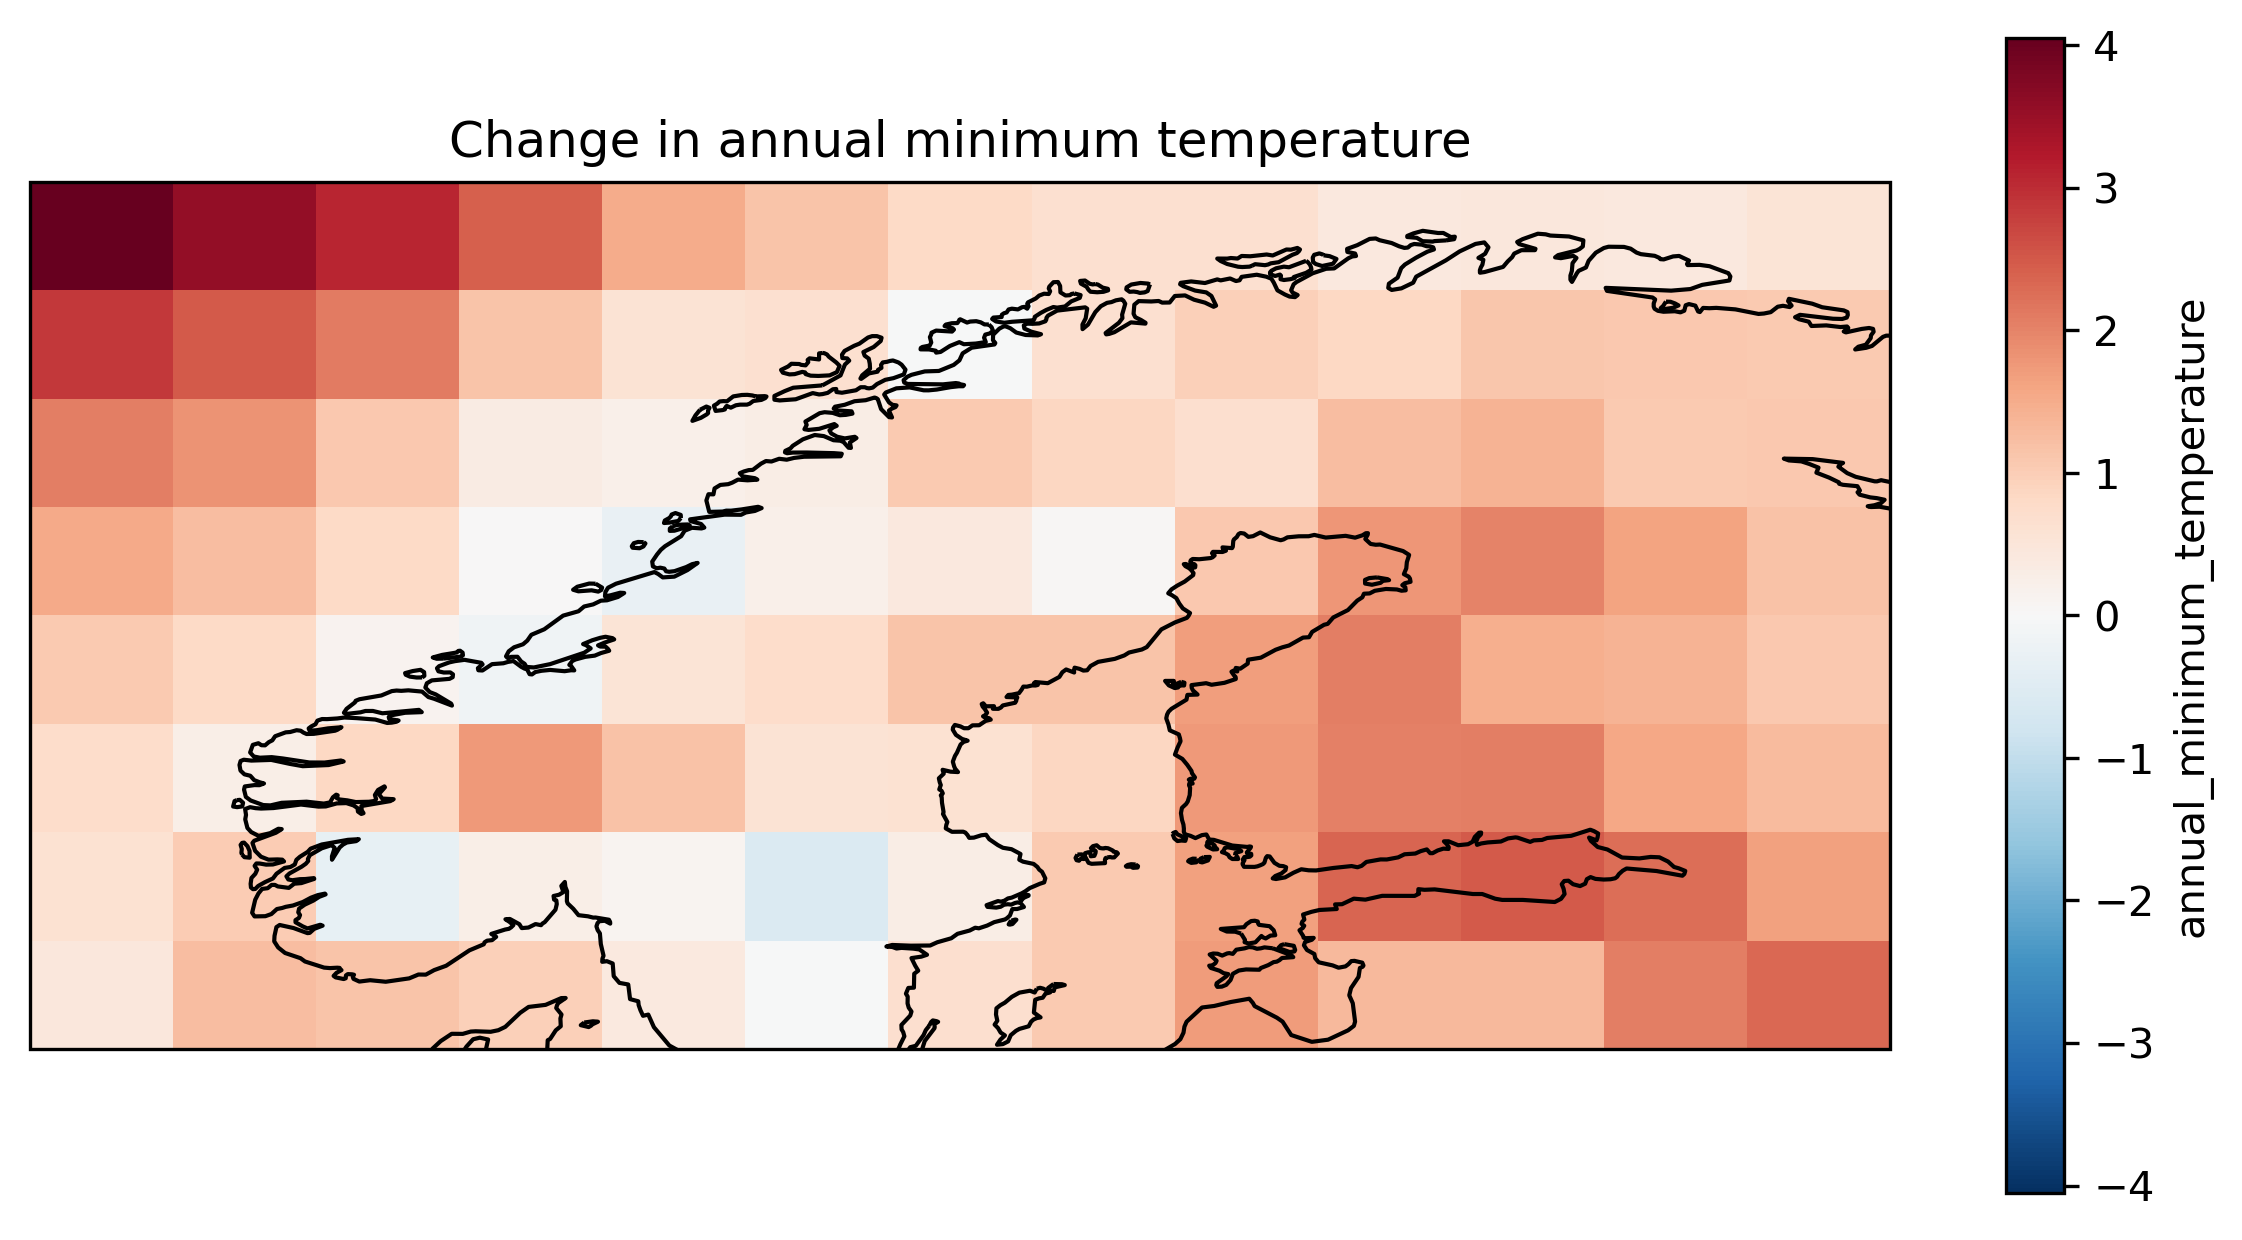

In [7]:
tmin_Norway = xr.open_dataset("../TNmin_NorESM2.nc")
data = tmin_Norway.annual_minimum_temperature
fig = plt.figure(1, figsize=(10,5),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
diff = data.isel(time=slice(20,40)).mean("time") - data.isel(time=slice(0,20)).mean("time")
map = diff.plot(ax=ax, 
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title("Change in annual minimum temperature")

print(len(np.arange(2015,2056,1)))